# **Portfolio Optimization**

### Add project path to system path

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

### Import modules

In [2]:
from script.Portfolio_optimization import Optimization
optimizer=Optimization()

### Load Data

In [3]:
forecast_data=optimizer.load_data("data/forecast.csv")

### **Percentage Return**
We take the log of percentage change.The reason for this is that log of the returns is **time additive**.

That is,
If **`r13`** is the returns for time between **`t3`** and **`t1`**.

**`r12`** is the returns between **`t1`** and **`t2`** and

`r23` is the returns between **`t2`** and **`t3`**.

Then, $$ log(r13) = log(r12) + log(r23) $$

In [4]:
pct_return=optimizer.log_pct_return(forecast_data)
pct_return

,TSLA,BND,SPY
Date,,,
2024-10-31,NaN,NaN,NaN
2024-11-01,1.850382e-02,-0.000896,-0.003088
2024-11-02,1.501109e-02,-0.000771,-0.004777
2024-11-03,1.263240e-02,-0.000682,-0.005863
2024-11-04,1.101193e-02,-0.000618,-0.006538
...,...,...,...
2025-10-26,0.000000e+00,-0.000101,-0.002035
2025-10-27,0.000000e+00,-0.000100,-0.002033
2025-10-28,-1.154081e-07,-0.000099,-0.002032


### **Variance**
The variance in prices of stocks are an important indicator of how volatile this investment will be (how returns can fluctuate).
$$
\sigma^2 = \frac{\sum_{i=1}^N (x_i - \bar{x})^2}{N - 1}\\

Where\\
\sigma^2 : \text {is the variance,}\\
𝑁 : \text {is the number of observations,}\\
𝑥_i : \text {is each individual observation,}\\
\bar{x} : \text {is the mean (average) of all observations.}
$$

In [5]:
variance=optimizer.variance(pct_return)
variance

TSLA    4.765268e-06
BND     3.314981e-08
SPY     1.371879e-06
dtype: float64

### **Volatility**
Volatility is measured as the standard deviation of a company’s stock.

If you carefully look at the formula for standard deviation, you will understand that it is just the square root of variance.
$$
s = \sqrt{\frac{\sum_{i=1}^N (x_i - \bar{x})^2}{N - 1}}\\

Where\\
s : \text {is the standard deviation,}\\
𝑁 : \text {is the number of observations,}\\
𝑥_i : \text {is each individual observation,}\\
\bar{x} : \text {is the mean (average) of all observations.}


$$

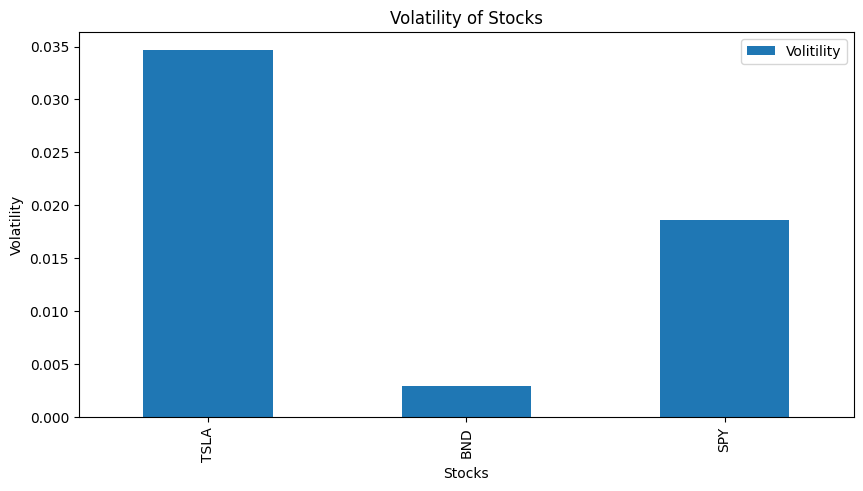

TSLA    0.034653
BND     0.002890
SPY     0.018593
dtype: float64

In [6]:
volatility=optimizer.volitility(forecast_data,variance)
volatility

### **Covariance**

In [7]:
cov_matrix=optimizer.cov_matrix(forecast_data)
cov_matrix

,TSLA,BND,SPY
TSLA,4.765268e-06,-9.501338e-08,-2.132777e-06
BND,-9.501338e-08,3.314981e-08,5.761393e-08
SPY,-2.132777e-06,5.761393e-08,1.371879e-06


### **Correlation**

In [8]:
corr_matrix=optimizer.corr_matrix(forecast_data)

## **Building an optimal risky portfolio**

### **Portfolio Expected Return**
Expected returns of an asset are simply the mean of percentage change in its stock prices. So, the value of expected return we obtain here are daily expected returns.

For an yearly expected return value, you will need to resample the data year-wise, as you will see further.

For expected returns, you need to define weights for the assets choosen.

In simpler terms, this means you need to decide what percentage of your total money to you want to hold in each company’s stock.

Usually this decision is done by using the optimization techniques

$$
E(R_p) = \sum_{i=1}^N w_i \cdot E(R_i)\\

Where\\
E(R_p) : \text {is the expected return of the portfolio,}\\
𝑁 : \text {is the number of assets in the portfolio,}\\
w_i : \text {is the weight of asset 𝑖 in the portfolio,}\\
E(R_i) : \text {is the expected return of asset 𝑖.}
$$


### **Annual Expected Return**

In [9]:
ind_er,ann_sd=optimizer.annual_return(forecast_data)

### **Efficient Frontier**
Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we need to accept for certain level of returns.

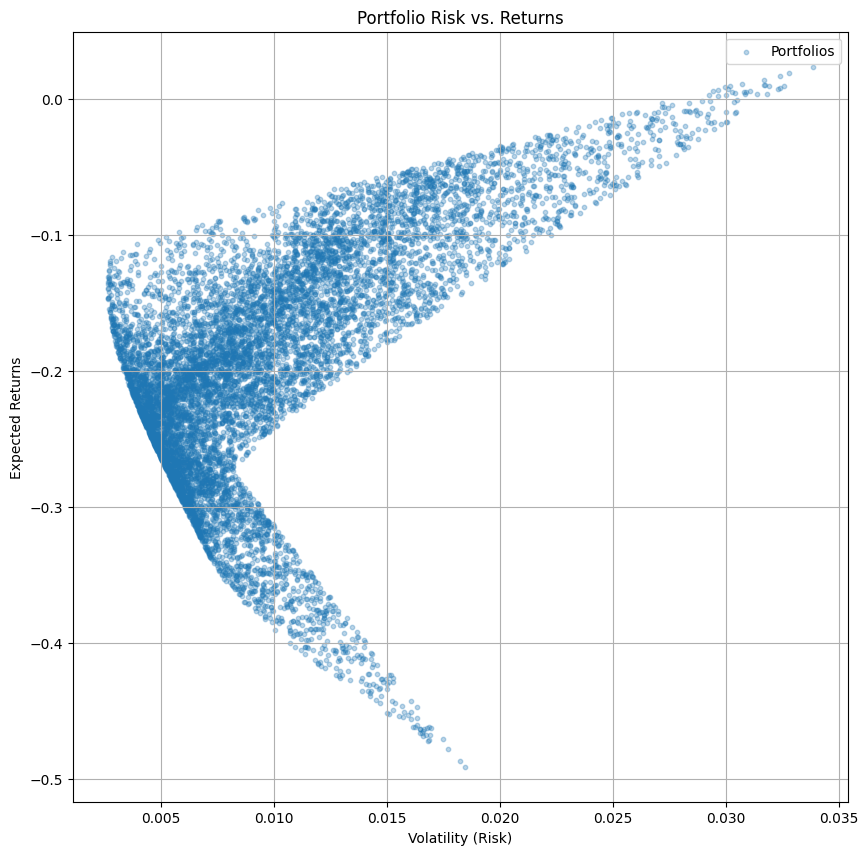

In [10]:
portfolios=optimizer.efficient_frontier_plot(forecast_data,cov_matrix,ind_er,ann_sd)

#### **Interpretation**
Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk.

The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.

On this graph, you can also see the combination of weights that will give you all possible combinations:

1. Minimum volatility (left most point)
2. Maximum returns (top most point)

### **Minimum Volatility Portfolio**

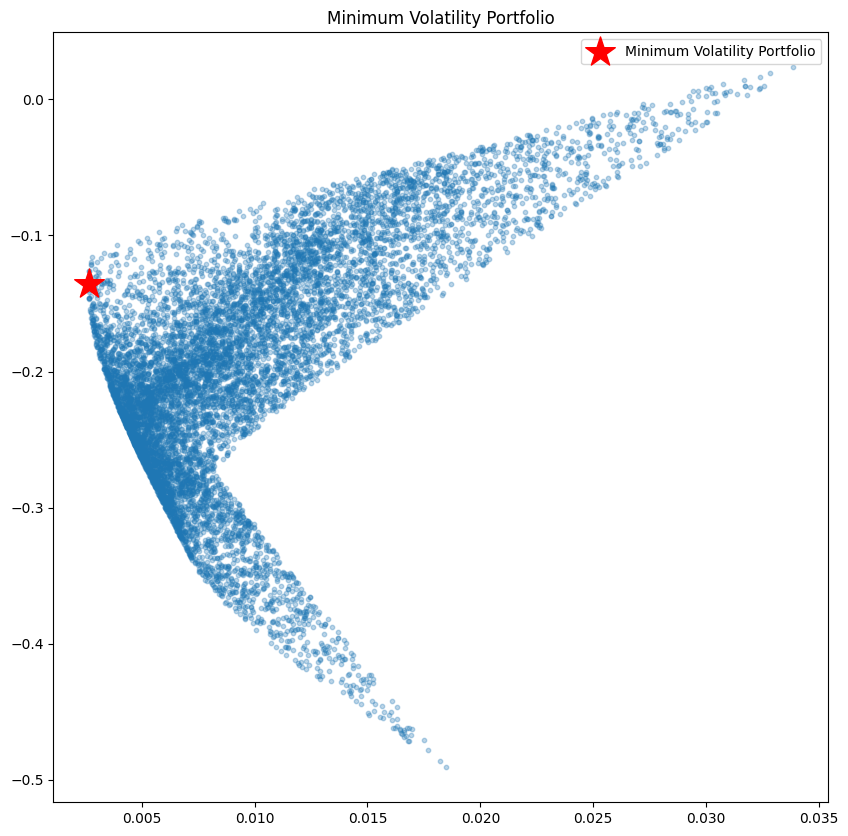

In [11]:
min_vol_port=optimizer.min_vol_port(portfolios)

### **Optimal Portfolio**

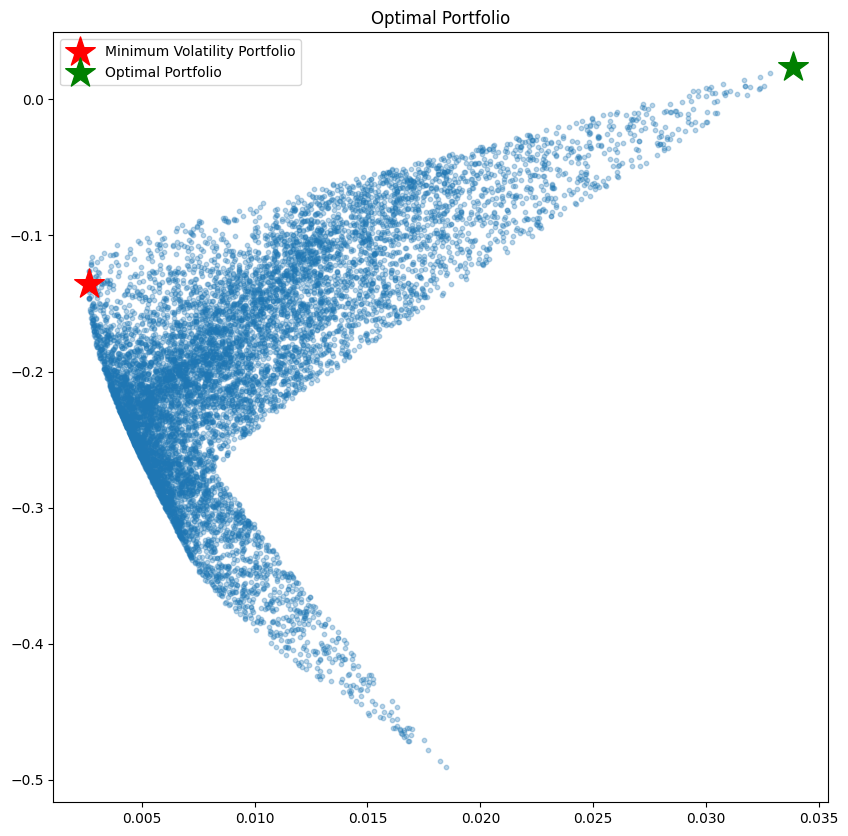

In [ ]:
optimal_portfolio=optimizer.optimal_port(portfolios,min_vol_port)
op
